# Assuntos

- trees classification
- rules classification
- rudimentary rules
- naive bayes
- data missing and number attributes


# Tree classification

In [2]:
from sklearn import tree
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
import matplotlib.image as pltimg
from sklearn.tree import DecisionTreeClassifier

[Text(257.53846153846155, 587.0880000000001, 'X[0] <= 0.5\ngini = 0.62\nsamples = 20\nvalue = [4, 10, 6]'),
 Text(103.01538461538462, 456.624, 'X[1] <= 0.5\ngini = 0.625\nsamples = 4\nvalue = [1, 1, 2]'),
 Text(51.50769230769231, 326.1600000000001, 'gini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(154.52307692307693, 326.1600000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(412.0615384615385, 456.624, 'X[0] <= 1.5\ngini = 0.586\nsamples = 16\nvalue = [3, 9, 4]'),
 Text(257.53846153846155, 326.1600000000001, 'X[1] <= 0.5\ngini = 0.406\nsamples = 8\nvalue = [1, 6, 1]'),
 Text(206.03076923076924, 195.69600000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(309.04615384615386, 195.69600000000003, 'X[1] <= 1.5\ngini = 0.56\nsamples = 5\nvalue = [1, 3, 1]'),
 Text(257.53846153846155, 65.23200000000008, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(360.55384615384617, 65.23200000000008, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(566.5846153846

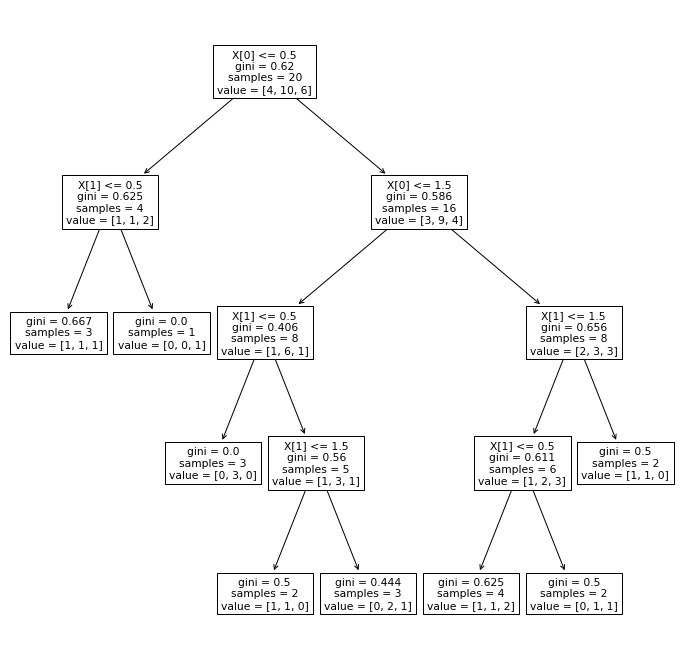

In [3]:
# fazendo array aleatorio de tamanho n
n = 20
X = np.random.randint(3,size=(n,2))
y = np.random.randint(3,size=n)

# tree classification
plt.figure(figsize=(12,12))
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

# Base de dados

In [23]:
data = {'Age': [36,42,23,52,43,44,66	,35,	52,	35,	24,	18,	45	],
        'Experience': [10, 12, 4, 4,	21, 14,	3,	14, 13,	5,	3,	3,	9,	],
        'Rank':[9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9],
        'Nationality':['UK', 'USA', 'N', 'USA', 'USA', 'UK', 'N',	'UK', 'N', 'N', 'USA', 'UK', 'UK'],
        'Go':['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES']
        }

df = pd.DataFrame(data)
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


# Método 1R (rudimentary rules)

- Como a classe Age é quantitativa, podemos dividir até uma certa quantidade de valores para saber qual a melhor classificação em %

In [5]:
n = len(df) # tamanho

# pegando a classe majoritaria da coluna Age
rule_age1 = df[(df['Age'] < df['Age'].mean()) & (df['Go'] == 'YES')] # df com idade < media classificadas com yes
rule_age2 = df[(df['Age'] < df['Age'].mean()) & (df['Go'] == 'NO')] # df com idade < media classificadas com no

rule_age3 = df[(df['Age'] > df['Age'].mean()) & (df['Go'] == 'YES')] # df com idade > media classificadas com yes
rule_age4 = df[(df['Age'] > df['Age'].mean()) & (df['Go'] == 'NO')] # df com idade > media classificadas com no

rule_age_size1 = len(rule_age1)
rule_age_size2 = len(rule_age2)
rule_age_size3 = len(rule_age3)
rule_age_size4 = len(rule_age4)

In [6]:
print(f"Entre a classe menor que a media: \n\tYES: {rule_age_size1}, NO: {rule_age_size2}\n")
print(f"Entre a classe maior que a media: \n\tYES: {rule_age_size3}, NO: {rule_age_size4}")

Entre a classe menor que a media: 
	YES: 3, NO: 3

Entre a classe maior que a media: 
	YES: 4, NO: 3


In [7]:
print(f"A classe majoritaria da coluna Age é: {rule_age_size1} (YES) e {rule_age_size2} (YES)\n")
print(f"A acurácia é: {rule_age_size1 + rule_age_size2}/{n} = {(rule_age_size1 + rule_age_size2)/n}")

A classe majoritaria da coluna Age é: 3 (YES) e 3 (YES)

A acurácia é: 6/13 = 0.46153846153846156


In [55]:
# agora fazendo a mesma coisa só que dividindo a idade até 43 anos:
rule_age1 = df[(df['Age'] <= 43) & (df['Go'] == 'YES')] # df com idade < media classificadas com yes
rule_age2 = df[(df['Age'] < 43) & (df['Go'] == 'NO')] # df com idade < media classificadas com no

rule_age3 = df[(df['Age'] >= 43) & (df['Go'] == 'YES')] # df com idade > media classificadas com yes
rule_age4 = df[(df['Age'] > 43) & (df['Go'] == 'NO')] # df com idade > media classificadas com no

rule_age_size1 = len(rule_age1)
rule_age_size2 = len(rule_age2)
rule_age_size3 = len(rule_age3)
rule_age_size4 = len(rule_age4)

In [56]:
print(f"Entre a classe menor que a media: \n\tYES: {rule_age_size1}, NO: {rule_age_size2}\n")
print(f"Entre a classe maior que a media: \n\tYES: {rule_age_size3}, NO: {rule_age_size4}")

Entre a classe menor que a media: 
	YES: 4, NO: 4

Entre a classe maior que a media: 
	YES: 4, NO: 2


In [57]:
print(f"A classe majoritaria da coluna Age é: {rule_age_size1} (YES) e {rule_age_size2} (YES)\n")
print(f"A acurácia é: {rule_age_size1 + rule_age_size2}/{n} = {(rule_age_size1 + rule_age_size2)/n}")

A classe majoritaria da coluna Age é: 4 (YES) e 4 (YES)

A acurácia é: 8/13 = 0.6153846153846154


In [58]:
# pegando a classe majoritaria da coluna Experience
rule_Experience1 = df[(df['Experience'] <= 12) & (df['Go'] == 'YES')] # df com idade < media classificadas com yes
rule_Experience2 = df[(df['Experience'] <= 12) & (df['Go'] == 'NO')] # df com idade < media classificadas com no

rule_Experience3 = df[(df['Experience'] > 12) & (df['Go'] == 'YES')] # df com idade > media classificadas com yes
rule_Experience4 = df[(df['Experience'] > 12) & (df['Go'] == 'NO')] # df com idade > media classificadas com no

rule_Experience_size1 = len(rule_Experience1)
rule_Experience_size2 = len(rule_Experience2)
rule_Experience_size3 = len(rule_Experience3)
rule_Experience_size4 = len(rule_Experience4)

In [63]:
print(f"Entre a classe menor que 12: \n\tYES: {rule_Experience_size1}, NO: {rule_Experience_size2}\n")
print(f"Entre a classe maior que 12: \n\tYES: {rule_Experience_size3}, NO: {rule_Experience_size4}")

Entre a classe menor que 12: 
	YES: 4, NO: 5

Entre a classe maior que 12: 
	YES: 3, NO: 1


In [61]:
print(f"A classe majoritaria da coluna Experience é: {rule_Experience_size1} (YES) e {rule_Experience_size2} (NO)\n")
print(f"A acurácia é: {rule_Experience_size1 + rule_Experience_size2}/{n} = {(rule_Experience_size1 + rule_Experience_size2)/n}")

A classe majoritaria da coluna Experience é: 4 (YES) e 5 (NO)

A acurácia é: 9/13 = 0.6923076923076923


# Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

### Data processing

In [65]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

In [66]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

In [67]:
X

,Age,Experience,Rank,Nationality
0,36,10,9,0
1,42,12,4,1
2,23,4,6,2
3,52,4,4,1
4,43,21,8,1
5,44,14,5,0
6,66,3,7,2
7,35,14,9,0
8,52,13,7,2
9,35,5,9,2


In [72]:
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

### Prediction

In [68]:
# digamos que queremos encontrar a classificação do seguinte:
# age = 30
# xp = 10
# rank = 3
# nacionality = usa (1)
# go = ?

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X, y)


GaussianNB()

In [70]:
pred = naive_bayes_classifier.predict([[30, 10, 3, 1]])
pred
# 0 = NO
# 1 = YES

array([0], dtype=int64)